In [76]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
%matplotlib inline

In [77]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
x_train = t.from_numpy(x_train).float()
y_train = t.from_numpy(y_train).float()
x_train.requires_grad = True
y_train.requires_grad = True

In [78]:
#初始化参数
def initial_parameters(x):
    parameters = {}
    w = nn.Parameter(t.randn(x.shape[1], 1))
    b = nn.Parameter(t.zeros(1))
    
    parameters['w'] = w
    parameters['b'] = b
    return parameters

In [79]:
#正向传播
def forward_prop(x,parameters):
    y_pred = t.mm(x, parameters['w']) + parameters['b']
    return y_pred

In [80]:
#计算loss
def get_loss(y_pred, y_train):
    return t.mean((y_pred - y_train) ** 2)

In [81]:
parameters = initial_parameters(x_train)
y_pred = forward_prop(x_train, parameters)
loss = get_loss(y_pred, y_train)
print(loss)

tensor(34.4955, grad_fn=<MeanBackward1>)


In [88]:
def gradient_descent(x, y, parameters, learning_rate = 0.01, iteration_num = 100):
    y_pred = forward_prop(x, parameters)
    loss = get_loss(y_pred, y_train)
    loss.backward()
    for e in range(iteration_num):
        y_pred = forward_prop(x, parameters)
        loss = get_loss(y_pred, y_train)
    
    
        parameters['w'].grad.zero_()
        parameters['b'].grad.zero_()
        loss.backward()
    
        parameters['w'].data = parameters['w'].data - learning_rate * parameters['w'].grad.data
        parameters['b'].data = parameters['b'].data - learning_rate * parameters['b'].grad.data
        if (e + 1) % 20 == 0:
            print('epoch:{}, loss:{:.5f}'.format(e + 1, loss))
    return parameters

In [89]:
def linear_modle(x, y, learning_rate = 0.01, iteration_num = 10000):
    parameters = initial_parameters(x)
    parameters = gradient_descent(x, y, parameters, learning_rate, iteration_num = 10000)
    return parameters

In [90]:
parameters = linear_modle(x_train, y_train)

epoch:20, loss:0.25716
epoch:40, loss:0.24853
epoch:60, loss:0.24075
epoch:80, loss:0.23373
epoch:100, loss:0.22739
epoch:120, loss:0.22168
epoch:140, loss:0.21652
epoch:160, loss:0.21187
epoch:180, loss:0.20767
epoch:200, loss:0.20388
epoch:220, loss:0.20046
epoch:240, loss:0.19738
epoch:260, loss:0.19460
epoch:280, loss:0.19209
epoch:300, loss:0.18982
epoch:320, loss:0.18778
epoch:340, loss:0.18593
epoch:360, loss:0.18427
epoch:380, loss:0.18277
epoch:400, loss:0.18142
epoch:420, loss:0.18019
epoch:440, loss:0.17909
epoch:460, loss:0.17810
epoch:480, loss:0.17720
epoch:500, loss:0.17639
epoch:520, loss:0.17566
epoch:540, loss:0.17500
epoch:560, loss:0.17440
epoch:580, loss:0.17387
epoch:600, loss:0.17338
epoch:620, loss:0.17295
epoch:640, loss:0.17255
epoch:660, loss:0.17220
epoch:680, loss:0.17188
epoch:700, loss:0.17159
epoch:720, loss:0.17133
epoch:740, loss:0.17109
epoch:760, loss:0.17088
epoch:780, loss:0.17069
epoch:800, loss:0.17051
epoch:820, loss:0.17036
epoch:840, loss:0.17

epoch:6920, loss:0.16892
epoch:6940, loss:0.16892
epoch:6960, loss:0.16892
epoch:6980, loss:0.16892
epoch:7000, loss:0.16892
epoch:7020, loss:0.16892
epoch:7040, loss:0.16892
epoch:7060, loss:0.16892
epoch:7080, loss:0.16892
epoch:7100, loss:0.16892
epoch:7120, loss:0.16892
epoch:7140, loss:0.16892
epoch:7160, loss:0.16892
epoch:7180, loss:0.16892
epoch:7200, loss:0.16892
epoch:7220, loss:0.16892
epoch:7240, loss:0.16892
epoch:7260, loss:0.16892
epoch:7280, loss:0.16892
epoch:7300, loss:0.16892
epoch:7320, loss:0.16892
epoch:7340, loss:0.16892
epoch:7360, loss:0.16892
epoch:7380, loss:0.16892
epoch:7400, loss:0.16892
epoch:7420, loss:0.16892
epoch:7440, loss:0.16892
epoch:7460, loss:0.16892
epoch:7480, loss:0.16892
epoch:7500, loss:0.16892
epoch:7520, loss:0.16892
epoch:7540, loss:0.16892
epoch:7560, loss:0.16892
epoch:7580, loss:0.16892
epoch:7600, loss:0.16892
epoch:7620, loss:0.16892
epoch:7640, loss:0.16892
epoch:7660, loss:0.16892
epoch:7680, loss:0.16892
epoch:7700, loss:0.16892


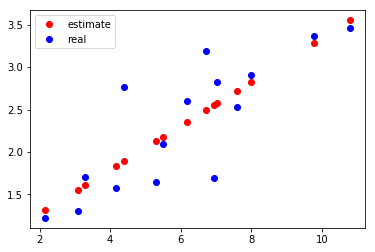

In [92]:
y_pred = forward_prop(x_train, parameters)

plt.plot(x_train.data.numpy(), y_pred.data.numpy(), 'ro', label = 'estimate')
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label = 'real')
plt.legend()